In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def read_excel(path):
    return pd.read_excel(path)

In [3]:
path_1 = '../Data/Preprocessing/Data Balonggandu/2023/3_lhrt_balonggandu_2023.xlsx'

df = read_excel(path_1)
df.head()

,HARI,JAM,MOTOR,MOBIL,TRUK/BUS,SMP_MTR,SMP_MBL,SMP_TRK,SMP
0,Friday,00:00,46,40,40,9,40,99,148
1,Friday,01:00,34,43,39,7,43,98,148
2,Friday,02:00,28,41,39,6,41,97,144
3,Friday,03:00,30,40,36,6,40,90,136
4,Friday,04:00,61,40,34,12,40,86,138


In [4]:
def normalisasi(df, HARI):
    data = df[df['HARI'] == HARI].copy() 
    data.loc[:, 'SMP_zscore'] = (data['SMP'] - data['SMP'].min()) / (data['SMP'].max() - data['SMP'].min())
    return data
    

In [5]:
day_names = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
day_names

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [6]:
# List untuk menampung hasil normalisasi
df_list = []

# Iterasi untuk setiap hari dan normalisasi data
for day in day_names:
    df_normalized = normalisasi(df, day)
    df_list.append(df_normalized)

# Menggabungkan kembali hasilnya menjadi satu DataFrame
df_result = pd.concat(df_list)

In [7]:
df = df_result.copy()
df.to_excel('../Data/Preprocessing/Data Balonggandu/2023/4_lhrt_normalisasi_balonggandu_2023.xlsx', index=False)
df.head(48)

,HARI,JAM,MOTOR,MOBIL,TRUK/BUS,SMP_MTR,SMP_MBL,SMP_TRK,SMP,SMP_zscore
24,Monday,00:00,86,48,43,17,48,107,172,0.200637
25,Monday,01:00,65,50,45,13,50,113,176,0.213376
26,Monday,02:00,56,50,46,11,50,114,175,0.210191
27,Monday,03:00,71,49,42,14,49,105,168,0.187898
28,Monday,04:00,138,49,39,28,49,98,174,0.207006
29,Monday,05:00,323,50,37,65,50,92,206,0.308917
30,Monday,06:00,733,79,79,147,79,198,423,1.000000
31,Monday,07:00,548,100,65,110,100,164,373,0.840764
32,Monday,08:00,296,105,57,59,105,144,308,0.633758
33,Monday,09:00,289,113,51,58,113,127,298,0.601911


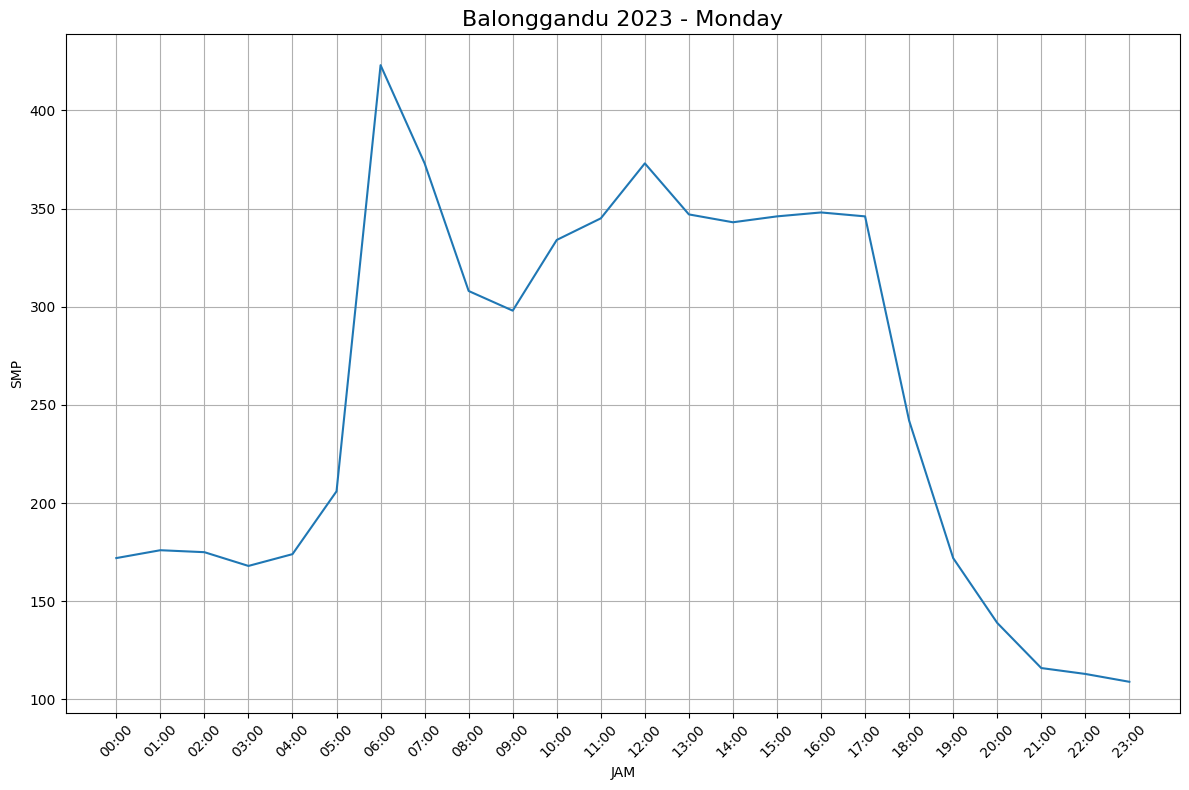

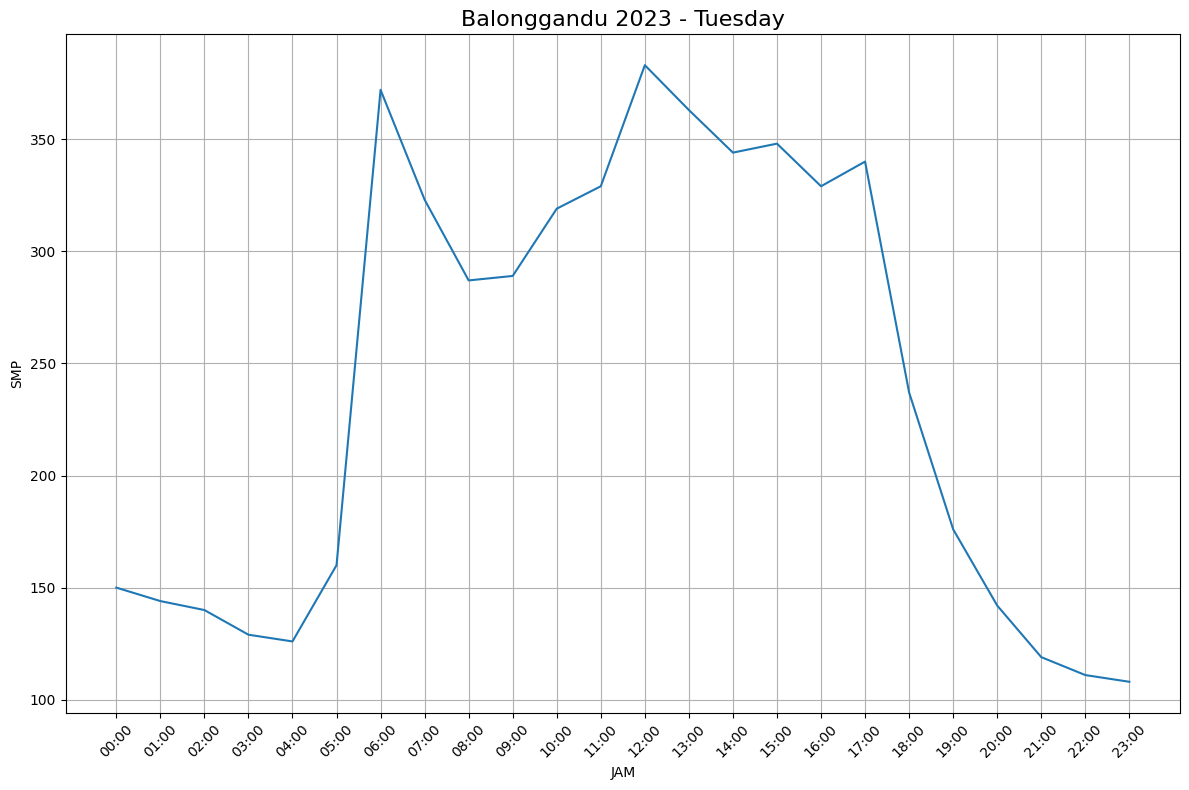

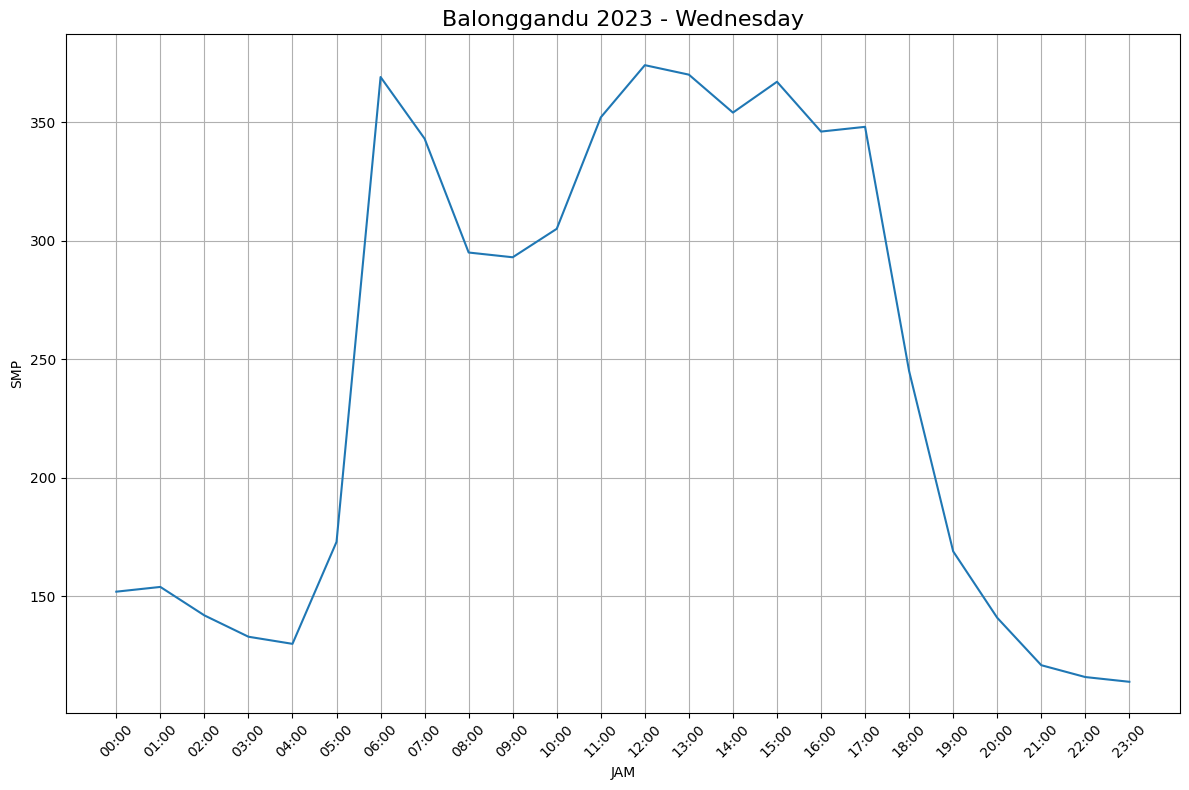

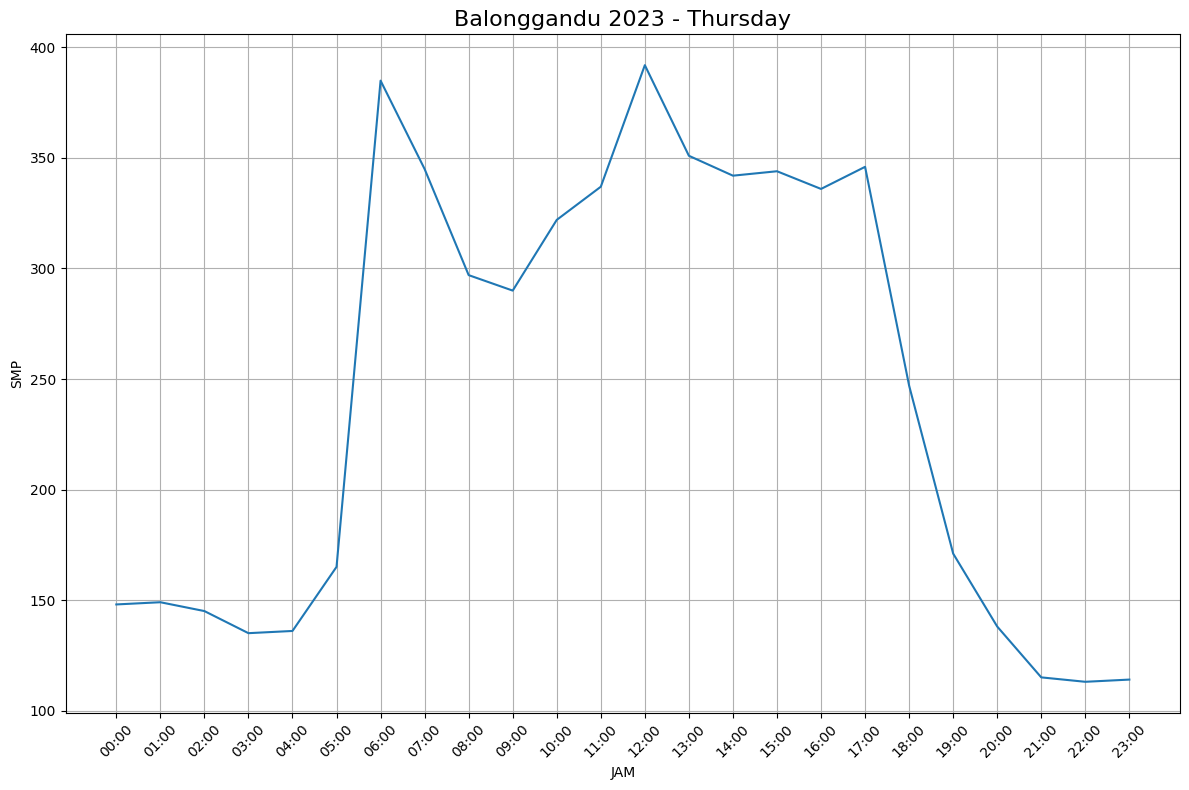

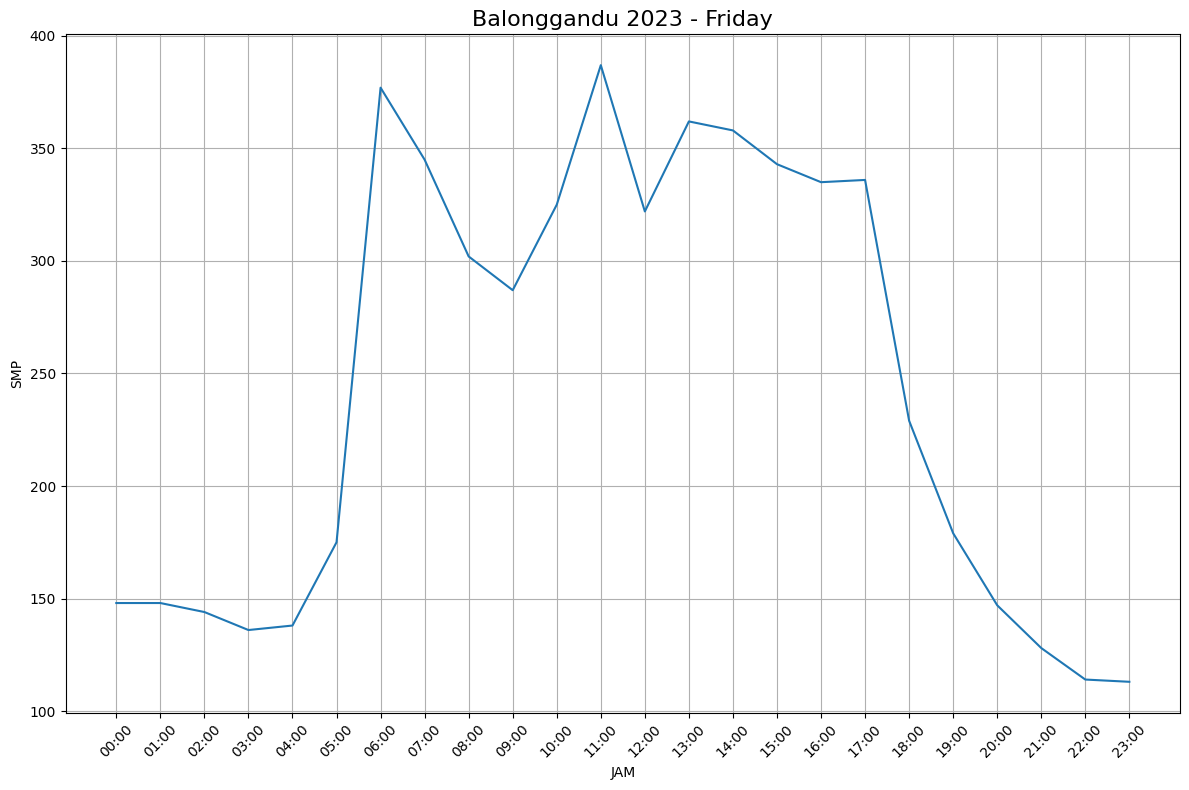

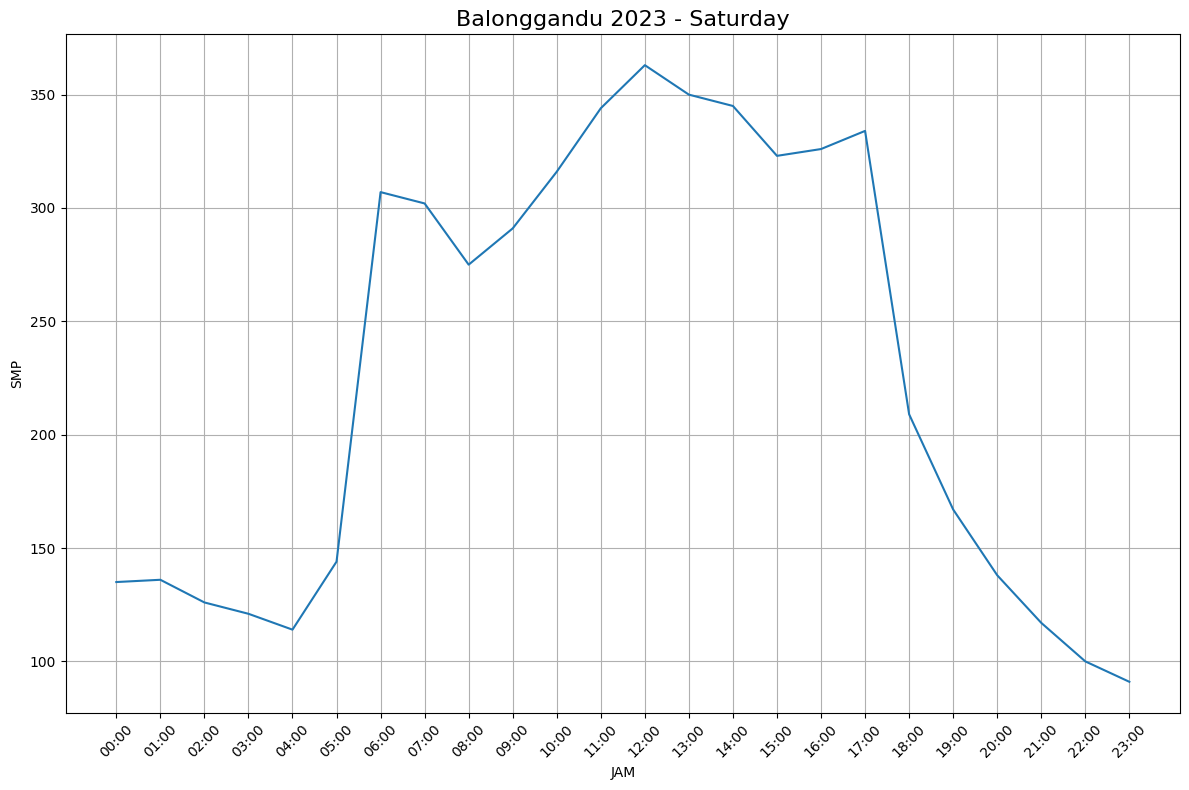

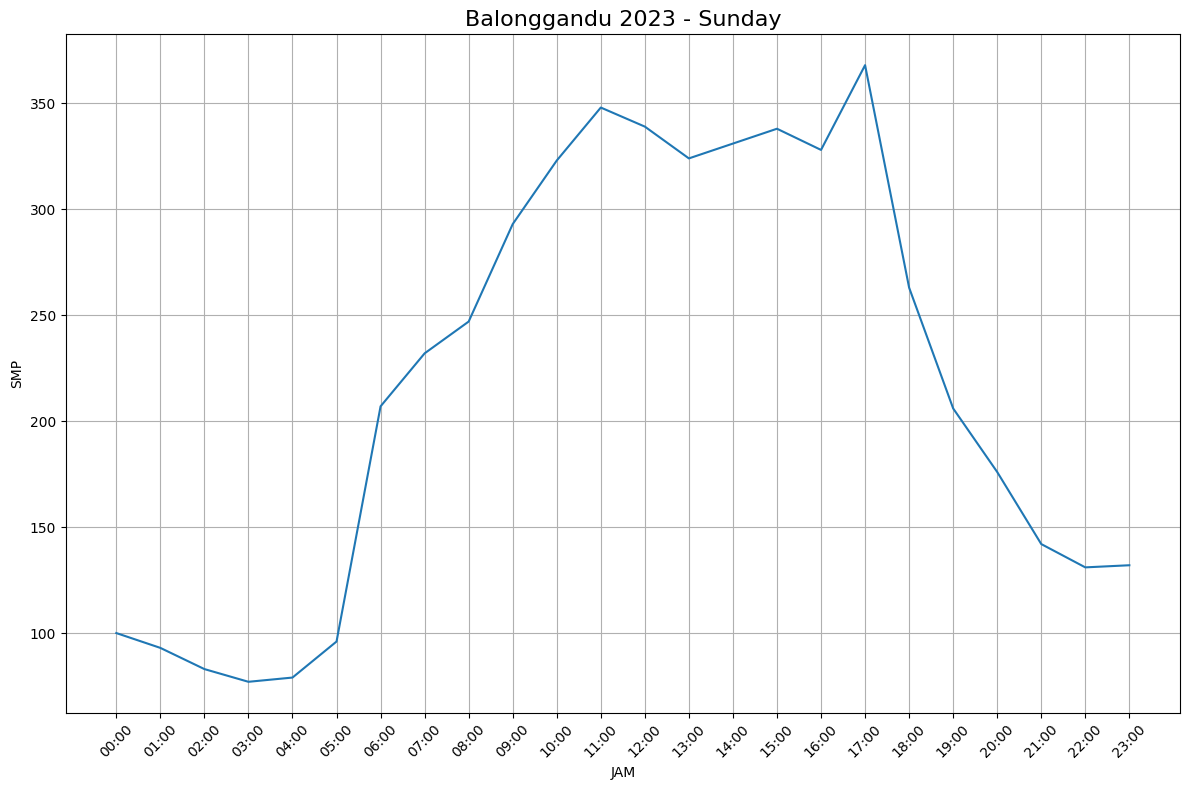

In [8]:
# Urutkan hari secara berurut
urutan_hari = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['HARI'] = pd.Categorical(df['HARI'], categories=urutan_hari, ordered=True)

# Iterasi melalui hari dan plot setiap hari
for i, hari in enumerate(urutan_hari):
    fig = plt.subplots(figsize=(12, 8))
    data_harian = df[df['HARI'] == hari]  # Filter data per hari
    sns.lineplot(x=data_harian['JAM'], y=data_harian['SMP'])
    plt.title('Balonggandu 2023 - ' + hari, fontsize=16)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('../Data/Visualisasi/Balonggandu/2023/4_'+str(i+1)+'_'+hari+'_balonggandu_2023.png')
    plt.show()

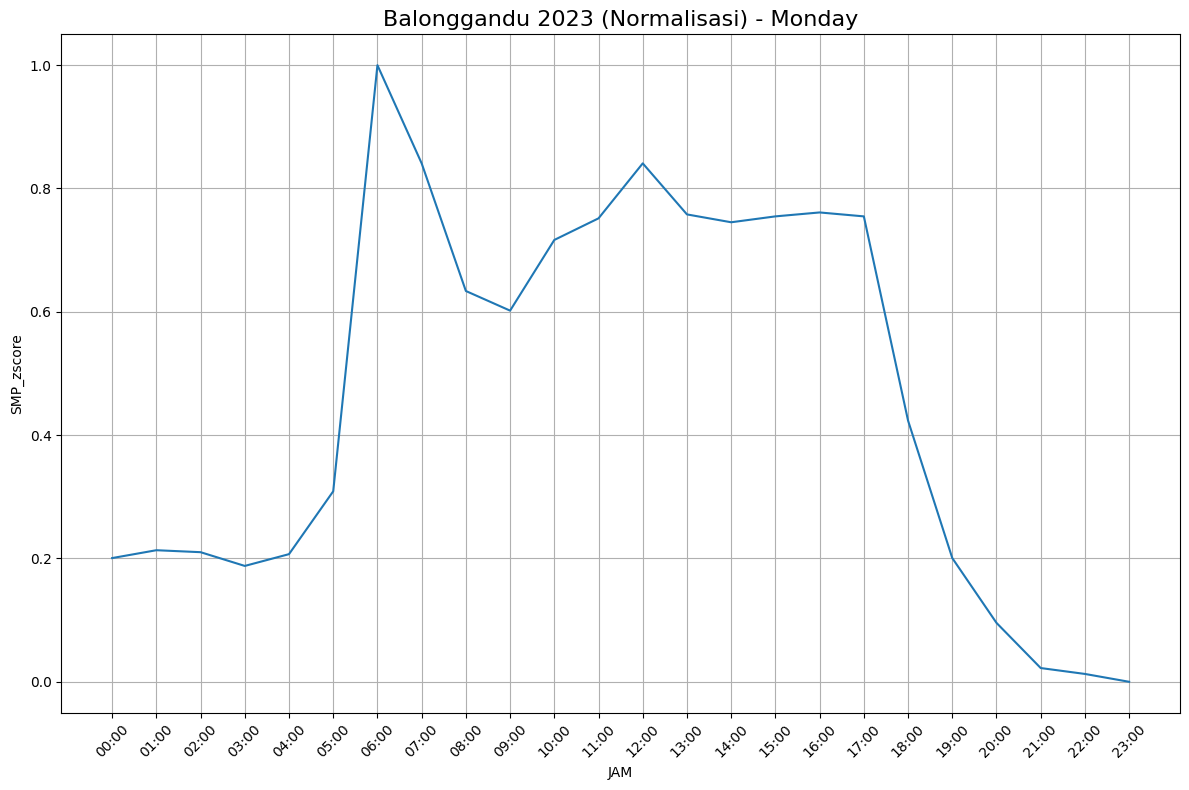

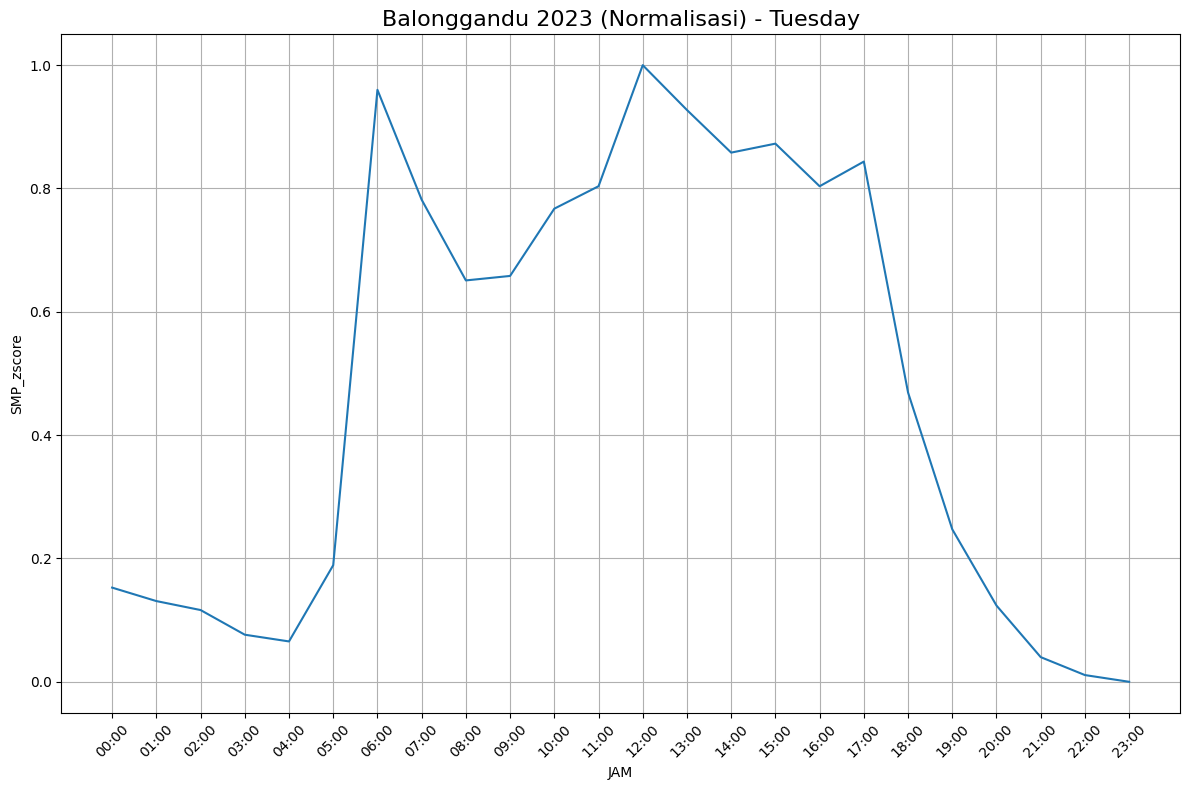

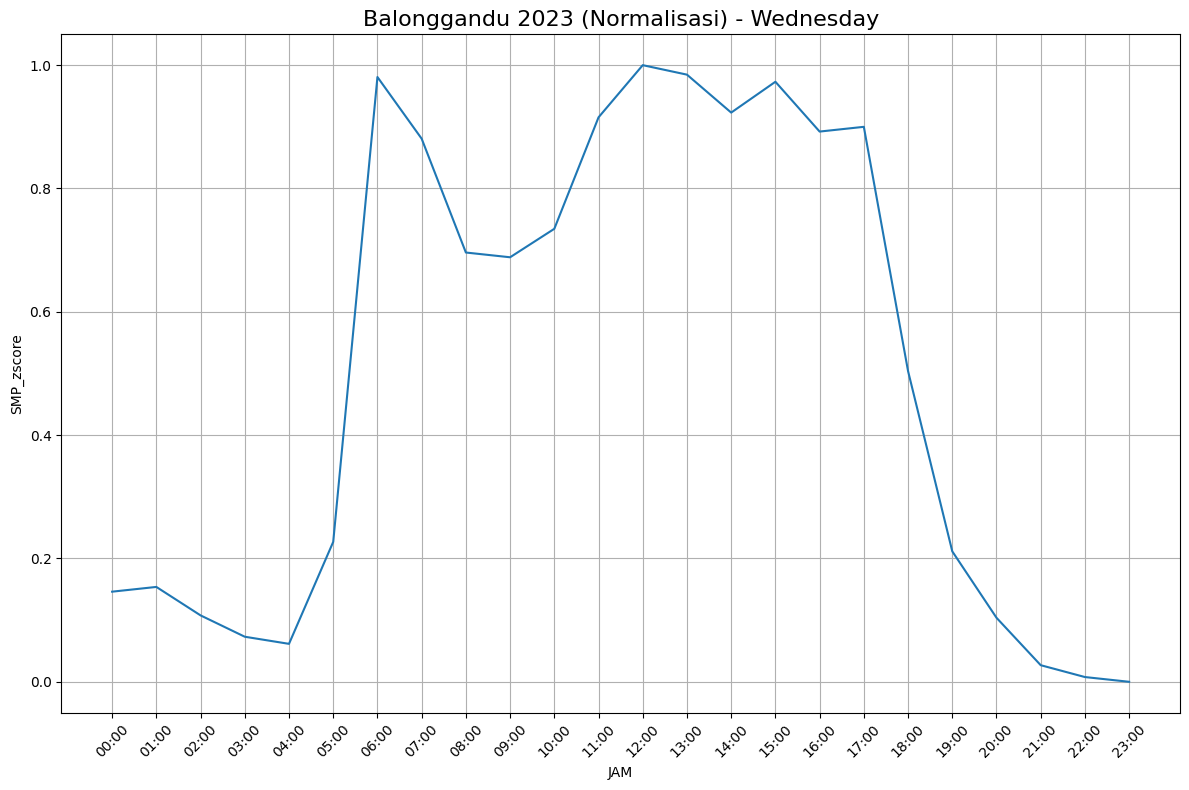

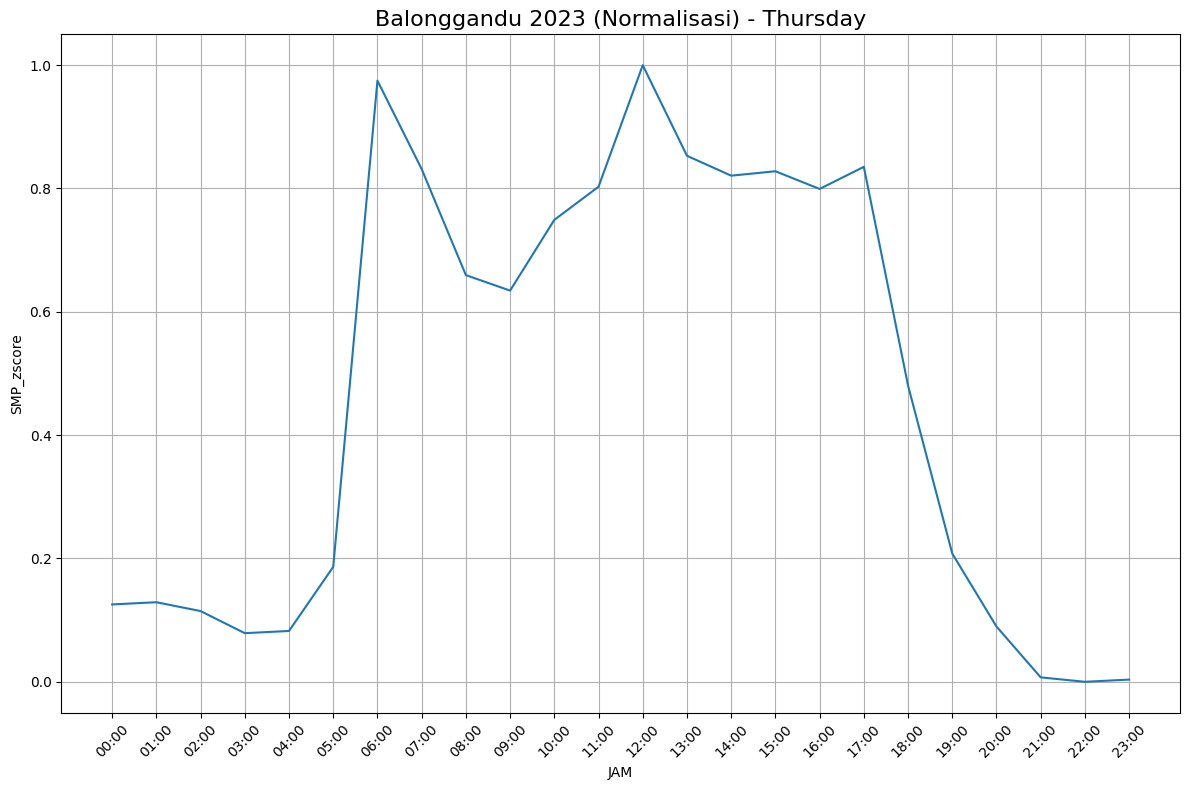

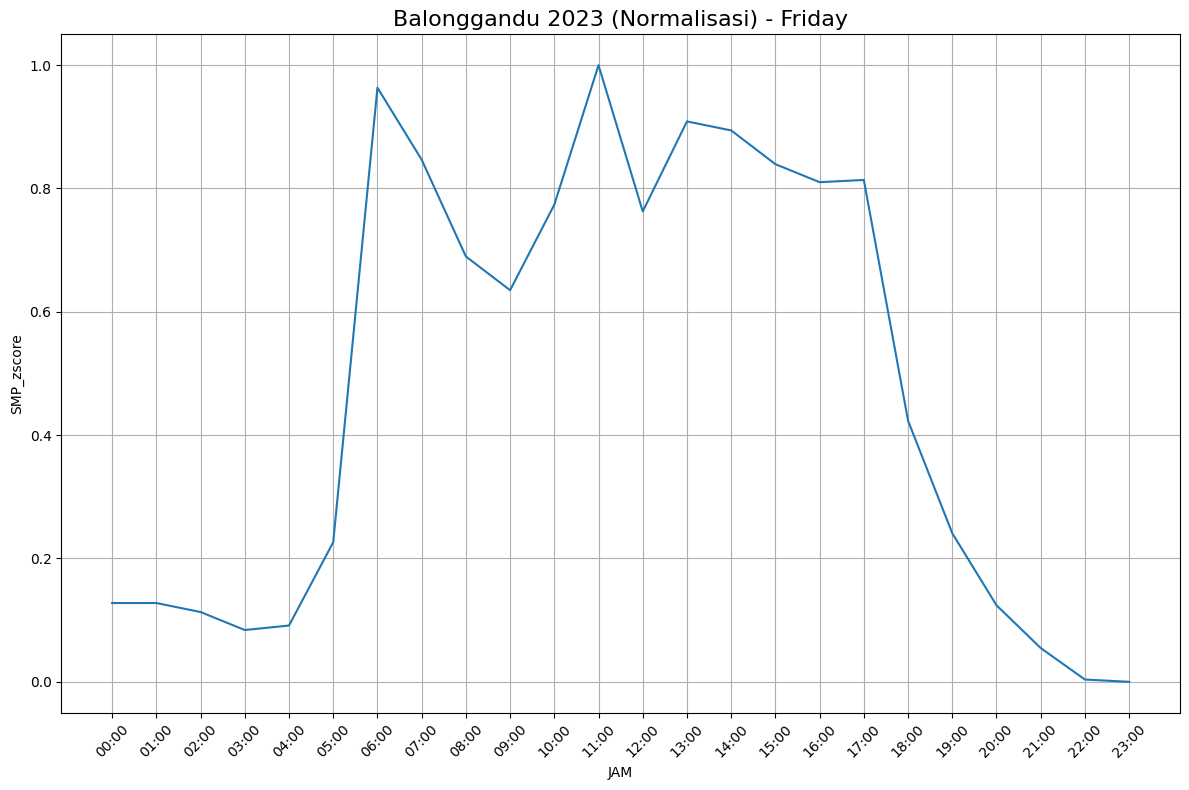

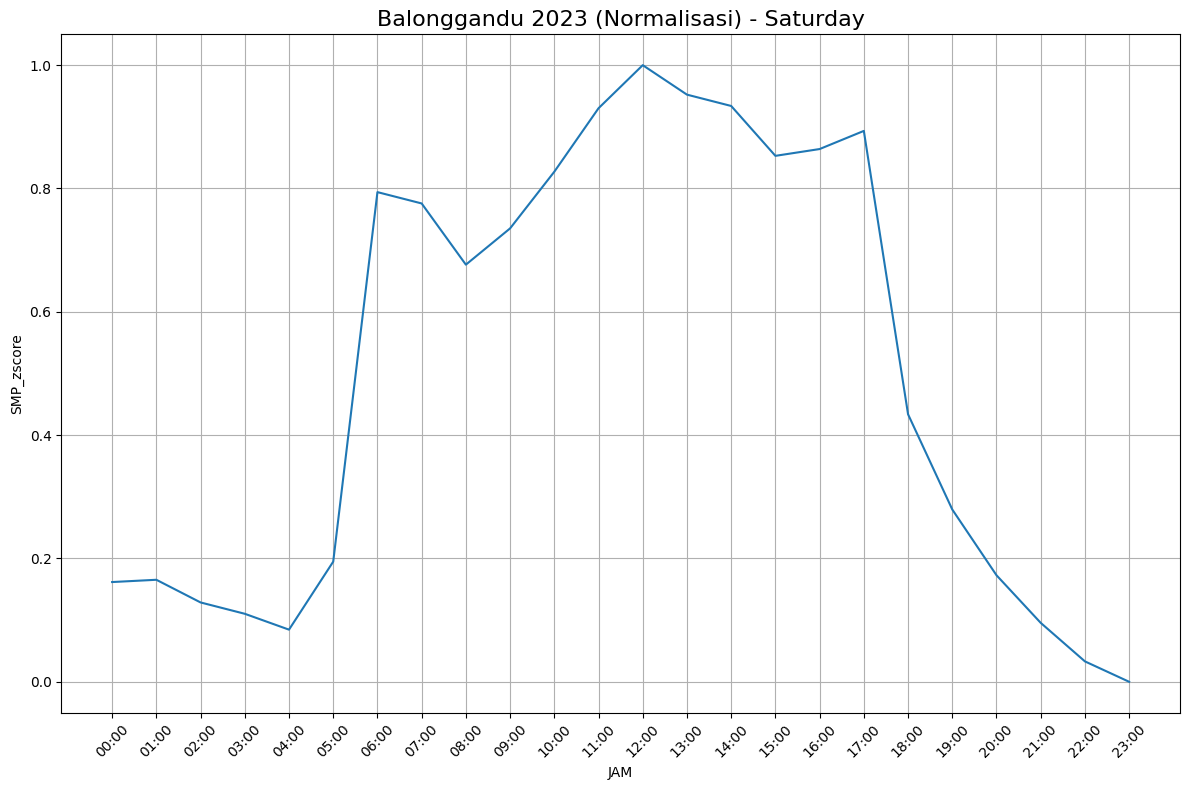

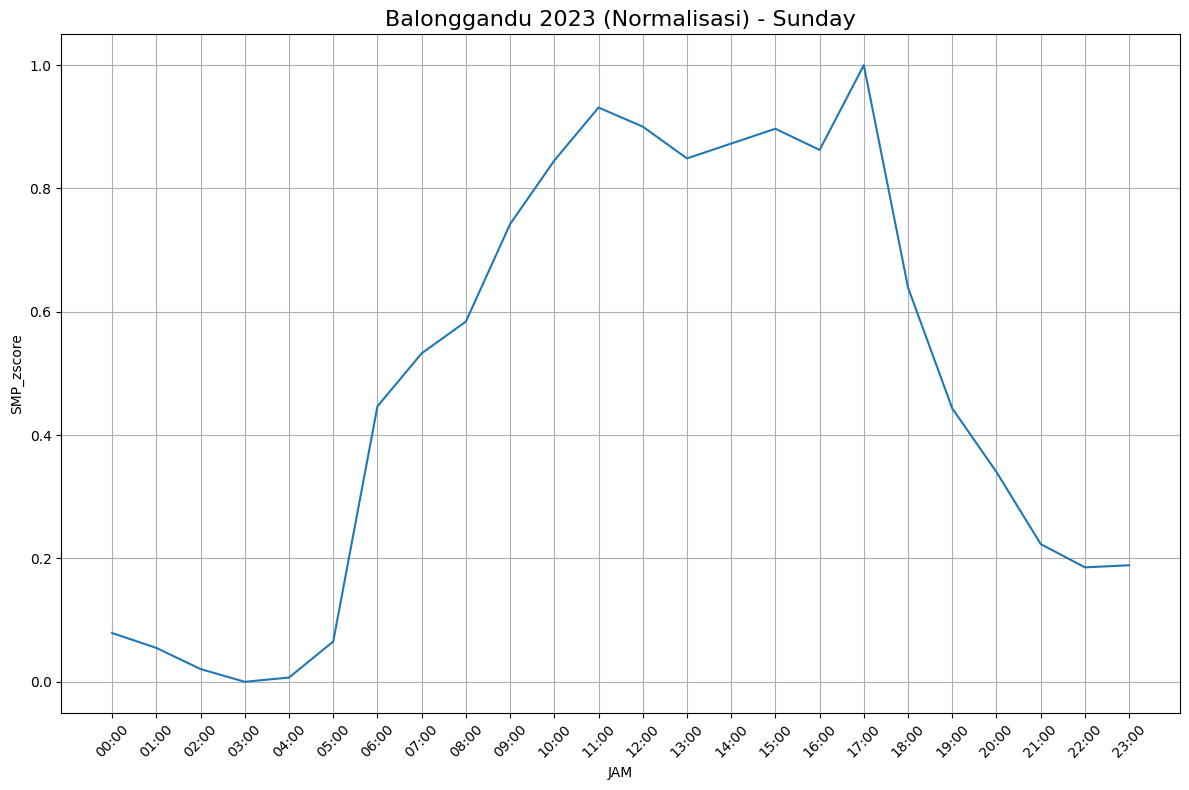

In [9]:
# Urutkan hari secara berurut
urutan_hari = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['HARI'] = pd.Categorical(df['HARI'], categories=urutan_hari, ordered=True)

# Iterasi melalui hari dan plot setiap hari
for i, hari in enumerate(urutan_hari):
    fig = plt.subplots(figsize=(12, 8))
    data_harian = df[df['HARI'] == hari]  # Filter data per hari
    sns.lineplot(x=data_harian['JAM'], y=data_harian['SMP_zscore'])
    plt.title('Balonggandu 2023 (Normalisasi) - ' + hari, fontsize=16)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)
    plt.savefig('../Data/Visualisasi/Balonggandu/2023/4_'+str(i+1)+'_'+hari+'_normalisasi_balonggandu_2023.png')
    plt.show()

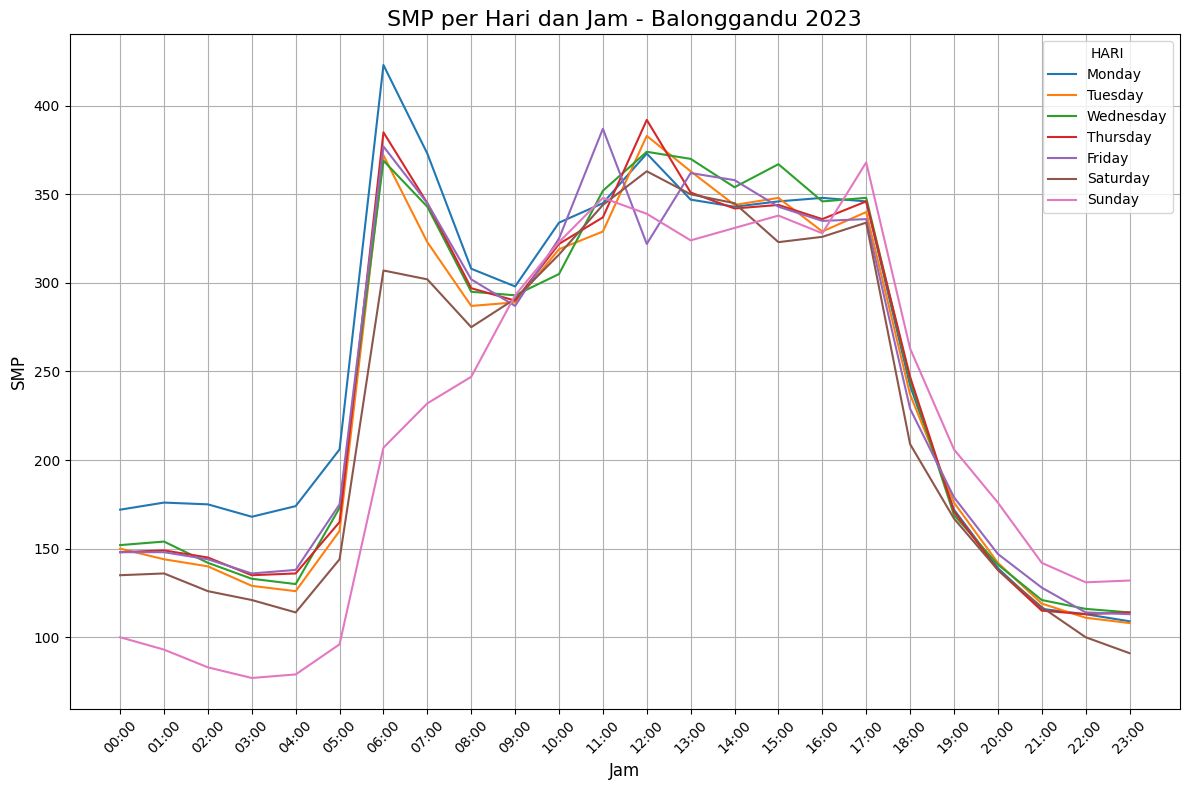

In [10]:
# Ubah 'JAM' menjadi tipe waktu dan 'HARI' menjadi kategori berurut
urutan_hari = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['HARI'] = pd.Categorical(df['HARI'], categories=urutan_hari, ordered=True)
# df['JAM'] = pd.to_datetime(df['JAM'], format='%H:%M').dt.time

# Membuat visualisasi menggunakan Seaborn lineplot
plt.figure(figsize=(12, 8))
sns.lineplot(x=df['JAM'].astype(str), y=df['SMP'], hue=df['HARI'])

# Menambahkan label dan judul
plt.title('SMP per Hari dan Jam - Balonggandu 2023', fontsize=16)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('SMP', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Menampilkan visualisasi
plt.tight_layout()
plt.savefig('../Data/Visualisasi/Balonggandu/2023/4_harian_balonggandu_2023.png')
plt.show()

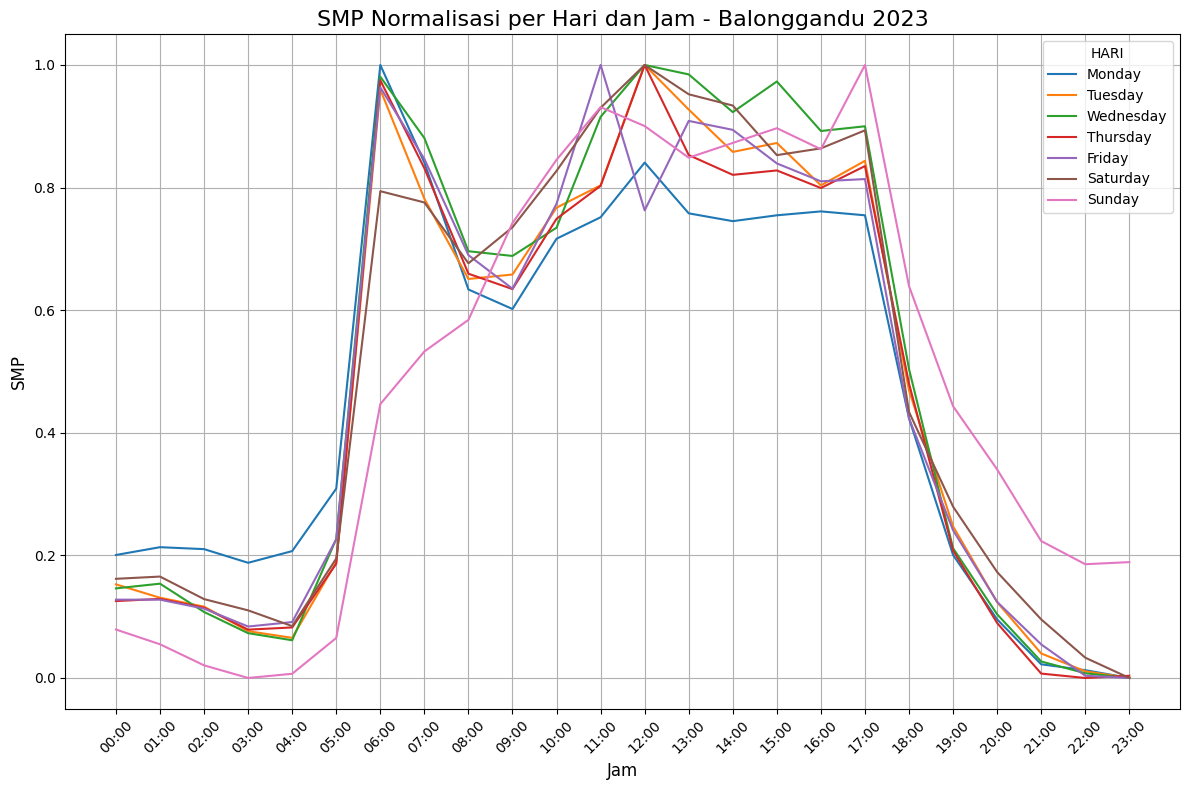

In [11]:
# Ubah 'JAM' menjadi tipe waktu dan 'HARI' menjadi kategori berurut
urutan_hari = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['HARI'] = pd.Categorical(df['HARI'], categories=urutan_hari, ordered=True)
# df['JAM'] = pd.to_datetime(df['JAM'], format='%H:%M').dt.time

# Membuat visualisasi menggunakan Seaborn lineplot
plt.figure(figsize=(12, 8))
sns.lineplot(x=df['JAM'].astype(str), y=df['SMP_zscore'], hue=df['HARI'])

# Menambahkan label dan judul
plt.title('SMP Normalisasi per Hari dan Jam - Balonggandu 2023', fontsize=16)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('SMP', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Menampilkan visualisasi
plt.tight_layout()
plt.savefig('../Data/Visualisasi/Balonggandu/2023/4_harian_normalisasi_balonggandu_2023.png')
plt.show()